In [29]:
'''
APPROACH:
We only want to count the number of cells and not the number of granules.
In order to do this, I used blob detection from the skimage library. If we apply blob detection
on the original image it highlights the outer cell as well as the inner granules. In order to fix
this I blurred the original image 3 times such that the blob detection algorithm treats the granules
in a cell as a cluster of 1 granule. Blob detection detects brighter blobs on a darker background only,
so we need to invert the image after applying a threshold for segmentation such that the cells are
brighter than the background.
'''

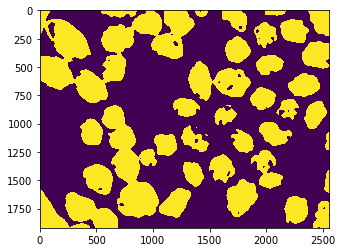

In [30]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import disk
from skimage.filters import rank
from skimage.filters import threshold_isodata
import cv2
import numpy as np
# Get original Image
image = cv2.imread("Desktop/TestImage0075.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Blur the original image 3x 
original_image = image
selem = disk(20)
for i in range(2):
    image = rank.mean(image, selem=selem)
# Apply isodata threshold to distinguish cells from background and create binary image
thresh = threshold_isodata(image)
binary_image = image > thresh
# Invert binary image
inverted_image = np.invert(binary_image)
plt.imshow(inverted_image)

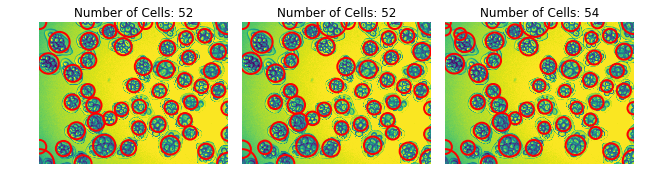

In [31]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
# Apply blob detection, 3 different variants with different parameters, pick best result.
image_gray = rgb2gray(inverted_image)
blobs_log = blob_log(image_gray,min_sigma=65,max_sigma=140, num_sigma=10, threshold=.01)
blobs_log2 = blob_log(image_gray,min_sigma=65,max_sigma=140, num_sigma=5, threshold=.1)
blobs_log3 = blob_log(image_gray,min_sigma=58,max_sigma=140, num_sigma=10, threshold=.1)

# Compute radii
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
blobs_log2[:, 2] = blobs_log2[:, 2] * sqrt(2)
blobs_log3[:, 2] = blobs_log3[:, 2] * sqrt(2)
# Display prep
blobs_list = [blobs_log,blobs_log2,blobs_log3]
colors = ["red","red","red"]
titles = ["Number of Cells: "+str(len(blobs_log)),
          "Number of Cells: "+str(len(blobs_log2)),
          "Number of Cells: "+str(len(blobs_log3))]
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(original_image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [27]:
fig.savefig("Desktop/NumCells.png")